# Loan Status Prediction

In [1]:
import pandas as pd

train_df = pd.read_csv('nondiscr_dataset.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Living Area            150000 non-null  object
 1   Discriminatory Factor  150000 non-null  object
 2   Education              150000 non-null  object
 3   Economic Status        150000 non-null  object
 4   Credit History         150000 non-null  object
 5   Income                 150000 non-null  object
 6   Ethnicity              150000 non-null  object
 7   Credit Score           150000 non-null  object
 8   Gender                 150000 non-null  object
 9   Age                    150000 non-null  object
 10  Loan Amount            150000 non-null  object
 11  Loan Status            150000 non-null  object
dtypes: object(12)
memory usage: 13.7+ MB


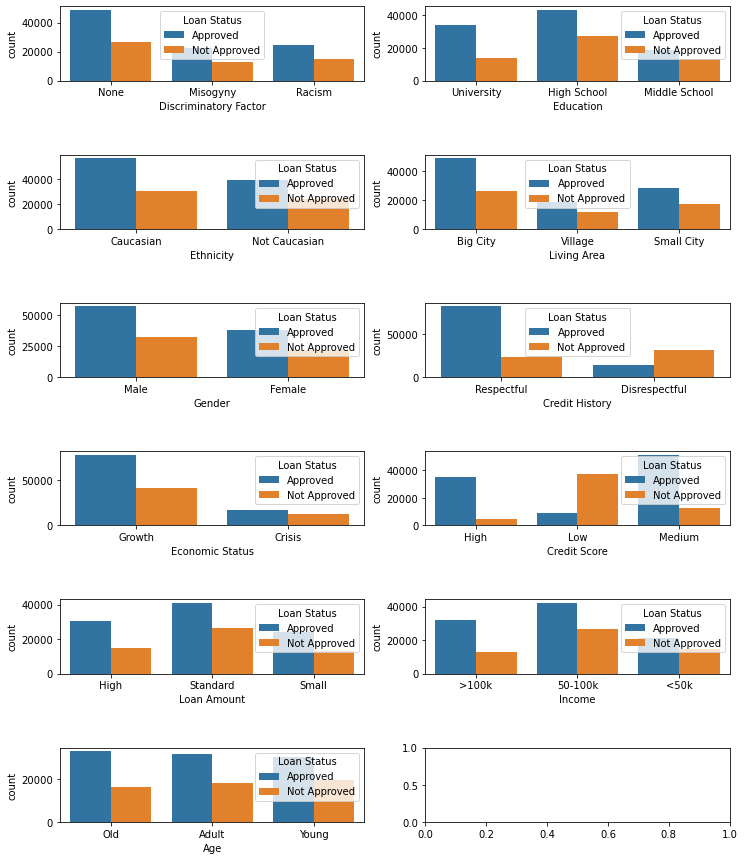

In [2]:
# Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['Discriminatory Factor','Education','Ethnicity','Living Area','Gender','Credit History','Economic Status','Credit Score','Loan Amount','Income','Age']
fig,axes = plt.subplots(6,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='Loan Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

In [3]:
train_df

,Living Area,Discriminatory Factor,Education,Economic Status,Credit History,Income,Ethnicity,Credit Score,Gender,Age,Loan Amount,Loan Status
0,Big City,None,University,Growth,Respectful,>100k,Caucasian,High,Male,Old,High,Approved
1,Village,Misogyny,High School,Growth,Disrespectful,50-100k,Not Caucasian,Low,Female,Adult,Standard,Not Approved
2,Small City,Racism,High School,Growth,Respectful,50-100k,Not Caucasian,Medium,Female,Adult,Standard,Approved
3,Village,None,High School,Growth,Respectful,50-100k,Caucasian,Medium,Female,Adult,Small,Approved
4,Big City,None,University,Growth,Respectful,>100k,Caucasian,High,Male,Old,High,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,Small City,None,High School,Growth,Disrespectful,50-100k,Caucasian,Low,Male,Adult,High,Approved
149996,Small City,Misogyny,High School,Growth,Respectful,50-100k,Not Caucasian,Medium,Female,Adult,Standard,Approved
149997,Big City,None,High School,Growth,Respectful,50-100k,Caucasian,Low,Male,Young,Standard,Approved
149998,Big City,Misogyny,High School,Growth,Disrespectful,50-100k,Caucasian,Medium,Female,Young,Standard,Approved


In [4]:
# train_df = train_df.drop(columns = ['Education','Age','Loan Amount','Living Area','Income'])

In [5]:
train_df['Loan Status'].value_counts()

Approved        95601
Not Approved    54399
Name: Loan Status, dtype: int64

In [6]:
train_df['Credit Score'].value_counts()

Medium    64351
Low       45941
High      39708
Name: Credit Score, dtype: int64

In [7]:
train_df['Gender'].value_counts()

Male      90001
Female    59999
Name: Gender, dtype: int64

In [8]:
train_df.loc[[0]]

,Living Area,Discriminatory Factor,Education,Economic Status,Credit History,Income,Ethnicity,Credit Score,Gender,Age,Loan Amount,Loan Status
0,Big City,None,University,Growth,Respectful,>100k,Caucasian,High,Male,Old,High,Approved


In [9]:
# train_df_encoded.loc[[0]]

## Naive Bayes

In [10]:
from sklearn.naive_bayes import CategoricalNB
clf_nb = CategoricalNB()

In [11]:
# Transforming categorical attributes using dummies
# 0 is no 1 is yes
# 0 in y_test means approved
train_df_encoded = pd.get_dummies(train_df, drop_first=True)

In [12]:
# Split Features and Target Varible
X = train_df_encoded.drop(columns='Loan Status_Not Approved')
y = train_df_encoded['Loan Status_Not Approved']

# Splitting into Train -Test Data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [13]:
clf_nb.fit(X_train,y_train)
y_pred_nb = clf_nb.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_nb))

print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Confusion matrix
[[17335  1785]
 [ 3458  7422]]
Accuracy: 0.8252333333333334


## Decision Tree

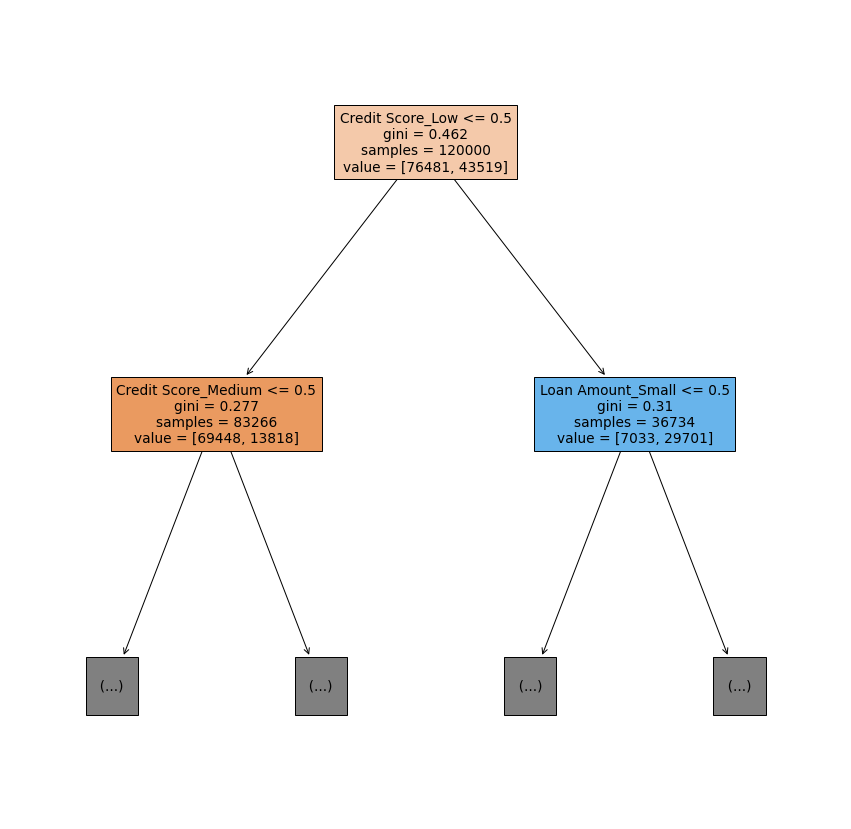

In [15]:
# BUILDING AND VISUALIZING THE TREE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

clf_dt = DecisionTreeClassifier(min_samples_split=20, random_state=42, max_depth = 3)
clf_dt.fit(X_train, y_train)

features = list(X_train.columns[:19])
plt.figure(figsize=(15,15))
graph = tree.plot_tree(clf_dt,feature_names=features, filled=True, max_depth = 1, )
plt.show(graph)

# ORANGE IS NO BLUE IS YES


In [16]:
y_pred_dt = clf_dt.predict(X_test)

In [17]:
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_dt))

print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Confusion matrix
[[17335  1785]
 [ 3458  7422]]
Accuracy: 0.8252333333333334


## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred_lr = clf_lr.predict(X_test)

In [20]:
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_lr))

print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Confusion matrix
[[17335  1785]
 [ 3458  7422]]
Accuracy: 0.8252333333333334


In [21]:
# The estimated coefficients will all be around 1:
coeff = clf_lr.coef_.reshape(18)

In [22]:
i = 0
for x in X_train.columns:
    print(x,coeff[i])
    i+=1


Living Area_Small City 0.008487975546558318
Living Area_Village -0.010843738099813177
Discriminatory Factor_None -0.034955817933686024
Discriminatory Factor_Racism -0.012244657714553023
Education_Middle School 0.0034028469390353735
Education_University -0.007932092874040696
Economic Status_Growth -0.6230310654780244
Credit History_Respectful 0.015214613507099638
Income_<50k -0.031578574571362865
Income_>100k 0.006613770440473149
Ethnicity_Not Caucasian 0.016430627660756866
Credit Score_Low 3.9344952659571337
Credit Score_Medium 0.9657892079846864
Gender_Male 0.018063207787641915
Age_Old -0.0312825899815532
Age_Young -0.005071842325987305
Loan Amount_Small -1.035002260355395
Loan Amount_Standard -0.3285104370584787


## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf_rf = RandomForestClassifier(n_estimators= 500, random_state=42)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [24]:
y_pred_rf = clf_rf.predict(X_test)
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_rf))

print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Confusion matrix
[[17263  1857]
 [ 3491  7389]]
Accuracy: 0.8217333333333333


In [25]:
X_test

,Living Area_Small City,Living Area_Village,Discriminatory Factor_None,Discriminatory Factor_Racism,Education_Middle School,Education_University,Economic Status_Growth,Credit History_Respectful,Income_<50k,Income_>100k,Ethnicity_Not Caucasian,Credit Score_Low,Credit Score_Medium,Gender_Male,Age_Old,Age_Young,Loan Amount_Small,Loan Amount_Standard
23258,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1
5806,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
55313,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0
14906,0,0,1,0,1,0,1,1,1,0,0,0,1,0,0,1,1,0
107701,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135836,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1
101703,0,1,1,0,1,0,1,0,0,0,1,1,0,1,1,0,0,1
108412,1,0,0,1,0,1,1,1,0,0,1,0,0,1,1,0,1,0
81000,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1


In [26]:
y_test

23258     1
5806      1
55313     1
14906     0
107701    1
         ..
135836    0
101703    1
108412    0
81000     0
50757     0
Name: Loan Status_Not Approved, Length: 30000, dtype: uint8

In [27]:
def show_pred(i):
    print("Prediction: ", int(clf_lr.predict(X_test.loc[[i]])))
    return train_df_encoded.loc[[i]]

In [28]:
index = X_test.index

In [29]:
index

Int64Index([ 23258,   5806,  55313,  14906, 107701, 134944,  35120,  89635,
             45206,  39384,
            ...
             45695,  36622,   1340,  44586,  70780, 135836, 101703, 108412,
             81000,  50757],
           dtype='int64', length=30000)

WRONG PREDICTIONS

In [30]:
# 0 is no 1 is yes
# 0 in y_test means approved
# top right is false positive in confusion matrix

In [31]:
index = y_test.index
for i in range(10000):
    if y_test.loc[index[i]] == y_pred_lr[i]:
        pass
    else:
        print(index[i])
    
    if i > 50:
        break

23258
35120
45206
134721
104058
140591
113864
107685
